## Description: Analysis on Parking Occupancy using publicly available data downloaded from data.lacity.org

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
la_park=pd.read_csv("LADOT_Parking_Meter_Occupancy.csv")

In [3]:
la_park.head()

,SpaceID,EventTime_UTC,OccupancyState
0,WV456,02/11/2019 04:23:59 PM,OCCUPIED
1,CB4405,05/19/2019 07:04:53 PM,VACANT
2,CB1395A,04/05/2019 07:09:44 PM,VACANT
3,CC967C,02/12/2019 05:05:58 PM,OCCUPIED
4,SV61,05/11/2019 12:02:32 PM,UNKNOWN


In [4]:
la_park.shape

(5748, 3)

In [5]:
## Let's look at the unique codes for parking ID
spaceid = pd.Series(la_park.SpaceID.unique())
spaceid.count()

5748

In [6]:
## Let's look at the Unknown occupancy 
## There are a total of 237 locations where the OccupancyState is unknown
la_park[la_park.OccupancyState == 'UNKNOWN']

,SpaceID,EventTime_UTC,OccupancyState
4,SV61,05/11/2019 12:02:32 PM,UNKNOWN
7,HO173,05/11/2019 11:55:43 AM,UNKNOWN
12,SV170B,10/19/2019 02:20:58 AM,UNKNOWN
16,SV58A,05/11/2019 01:06:59 PM,UNKNOWN
18,SV53,05/11/2019 01:22:35 PM,UNKNOWN
20,SV55,05/11/2019 01:18:39 PM,UNKNOWN
22,SV54,05/11/2019 01:21:08 PM,UNKNOWN
24,SV54A,05/11/2019 01:19:32 PM,UNKNOWN
25,SV51,05/11/2019 01:22:07 PM,UNKNOWN
26,SV48,05/11/2019 01:26:31 PM,UNKNOWN


## Unknown occupancy state could suggest that the sensors for these parking meters may need to be replaced

In [7]:
## Get date range for data
## Date range is from Feb.8, 2019 to Oct.23 2019
print(min(la_park.EventTime_UTC))
print(max(la_park.EventTime_UTC))

02/08/2019 06:42:19 PM
10/23/2019 12:59:58 AM


In [8]:
la_park.EventTime_UTC = pd.to_datetime(la_park.EventTime_UTC)

In [9]:
la_park.head()

,SpaceID,EventTime_UTC,OccupancyState
0,WV456,2019-02-11 16:23:59,OCCUPIED
1,CB4405,2019-05-19 19:04:53,VACANT
2,CB1395A,2019-04-05 19:09:44,VACANT
3,CC967C,2019-02-12 17:05:58,OCCUPIED
4,SV61,2019-05-11 12:02:32,UNKNOWN


In [10]:
from datetime import datetime

In [11]:
la_park['Year-Month'] = la_park['EventTime_UTC'].dt.to_period('M')

In [12]:
la_park.head()

,SpaceID,EventTime_UTC,OccupancyState,Year-Month
0,WV456,2019-02-11 16:23:59,OCCUPIED,2019-02
1,CB4405,2019-05-19 19:04:53,VACANT,2019-05
2,CB1395A,2019-04-05 19:09:44,VACANT,2019-04
3,CC967C,2019-02-12 17:05:58,OCCUPIED,2019-02
4,SV61,2019-05-11 12:02:32,UNKNOWN,2019-05


In [57]:
## Plot graph to see which month is most busy

## Step1: create a data table with OCCUPIED and VACANT parking spots

la_park_occupied = la_park[la_park['OccupancyState'] == 'OCCUPIED']

In [16]:
la_park_occupied.head()

,SpaceID,EventTime_UTC,OccupancyState,Year-Month
0,WV456,2019-02-11 16:23:59,OCCUPIED,2019-02
3,CC967C,2019-02-12 17:05:58,OCCUPIED,2019-02
5,WB422,2019-03-11 17:34:05,OCCUPIED,2019-03
13,61125,2019-10-23 02:19:53,OCCUPIED,2019-10
19,SV52,2019-05-11 13:11:34,OCCUPIED,2019-05


In [58]:
## Step 2: create data table summarizing amount of occupied space per month

la_park_monthly_occupied = pd.DataFrame(la_park_occupied.groupby('Year-Month')['OccupancyState'].\
                                        count()).reset_index()

In [28]:
la_park_monthly_occupied

,Year-Month,OccupancyState
0,2019-02,5
1,2019-03,15
2,2019-04,10
3,2019-05,42
4,2019-06,17
5,2019-07,6
6,2019-08,23
7,2019-09,31
8,2019-10,2976


## Since there are significantly more data for 2019-10 and the occupancy for other months 
## seem unreasonably low, this dataset is likely incomplete.

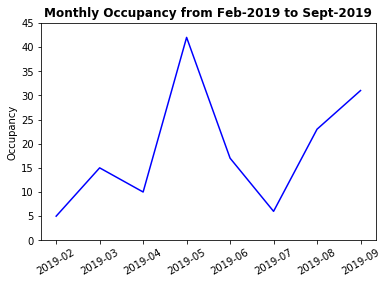

In [68]:
## Plot monthly occupied parking spot from 2019-02 to 2019-09

la_park_monthly_occupied = la_park_monthly_occupied[0:8]
la_park_monthly_vacant = la_park_monthly_vacant[0:8]
pos = np.arange(0,len(la_park_monthly_occupied['Year-Month']))

plt.figure()

plt.plot(pos, 'OccupancyState', data = la_park_monthly_occupied, 
         color = 'blue',
         label = 'Occupied')

plt.xticks(pos, rotation = 30)

ax = plt.gca()
ax.set_xticklabels(la_park_monthly_occupied['Year-Month'])
ax.set_yticks(range(0,50,5))

plt.title("Monthly Occupancy from Feb-2019 to Sept-2019", fontsize = 12, fontweight = 'bold')
plt.ylabel("Occupancy")

plt.show()


## From this plot, we can see that occupancy was high in May and trending upward since July.
## However, note that this may be due to incomplete information

## Next, look at daily data for Oct-2019

In [69]:
la_park_oct_occupied = la_park_occupied[la_park_occupied['Year-Month'] == '2019-10']

In [75]:
## Since we want daily data, we need to extract the days
la_park_oct_occupied['Day'] = pd.DatetimeIndex(la_park_oct_occupied['EventTime_UTC']).day

/Users/jennyshang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [77]:
la_park_oct_occupied.head()

,SpaceID,EventTime_UTC,OccupancyState,Year-Month,Day
13,61125,2019-10-23 02:19:53,OCCUPIED,2019-10,23
28,SV227,2019-10-23 02:20:03,OCCUPIED,2019-10,23
32,SV392,2019-10-23 02:08:54,OCCUPIED,2019-10,23
60,SV201,2019-10-23 02:20:05,OCCUPIED,2019-10,23
62,HO725,2019-10-23 01:49:38,OCCUPIED,2019-10,23


In [78]:
## Create data table summarizing amount of occupied space per day

la_park_oct_occupied = pd.DataFrame(la_park_oct_occupied.groupby('Day')['OccupancyState'].\
                                        count()).reset_index()
la_park_oct_occupied

,Day,OccupancyState
0,1,2
1,3,2
2,4,1
3,5,1
4,7,1
5,8,4
6,9,1
7,11,2
8,13,1
9,16,3
